In [1]:
#Tabular Playground Series - Jun 2021
#Link Below
#https://www.kaggle.com/competitions/tabular-playground-series-jun-2021

import warnings
warnings.filterwarnings('ignore') # uncomment this line to suppress warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [3]:
random_state = 42
np.random.seed(random_state)

In [4]:
# show 10 random records
df_train = pd.read_csv("train.csv")
df_train.sample(10, random_state=random_state)

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,target
119737,119737,0,0,15,0,0,0,0,0,11,...,0,0,1,0,0,0,1,0,0,Class_3
72272,72272,0,0,1,0,0,1,0,0,0,...,0,0,0,0,3,0,0,0,0,Class_6
158154,158154,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,Class_6
65426,65426,6,0,0,0,0,2,0,0,0,...,3,7,2,1,0,0,0,1,1,Class_8
30074,30074,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,Class_1
23677,23677,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,Class_2
134858,134858,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,1,0,0,0,Class_9
176418,176418,0,0,0,0,0,14,0,0,0,...,0,0,1,1,1,2,0,0,0,Class_2
132467,132467,0,2,1,3,1,0,0,7,8,...,0,1,0,0,20,18,1,0,1,Class_8
4082,4082,40,0,0,0,0,0,0,2,0,...,0,1,0,0,0,0,0,0,0,Class_5


In [7]:
# number of unique values
df_train.nunique().sort_values(ascending=False)[:30]

id            200000
feature_15       105
feature_60        99
feature_59        92
feature_73        91
feature_46        87
feature_28        78
feature_32        77
feature_54        72
feature_61        70
feature_63        70
feature_19        66
feature_55        65
feature_47        63
feature_62        61
feature_3         59
feature_29        58
feature_67        57
feature_41        56
feature_22        55
feature_5         55
feature_43        53
feature_69        52
feature_9         51
feature_24        50
feature_74        50
feature_70        49
feature_27        49
feature_51        49
feature_2         48
dtype: int64

In [10]:
target = "target"

classes = list(df_train[target].sort_values().unique())
classes

['Class_1',
 'Class_2',
 'Class_3',
 'Class_4',
 'Class_5',
 'Class_6',
 'Class_7',
 'Class_8',
 'Class_9']

In [19]:
# create X
le = LabelEncoder()

X = df_train.drop([target, "id"], axis=1)
y = le.fit_transform(df_train[target])

In [12]:
X.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
0,0,0,6,1,0,0,0,0,7,0,...,3,0,0,0,0,0,0,2,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,3,0,0,...,8,0,0,0,0,1,0,0,0,0
3,0,0,7,0,1,5,2,2,0,1,...,0,0,4,0,2,2,0,4,3,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
model_lbls = ['dt' # decision tree
             #,'nb' # gaussian naive bayes
             ,'rf'   # random forest
             #,'lp'   # linear perceptron
             #,'svc'  # support vector
             #,'knn'  # k nearest neighbours
             #,'adb'  # adaboost
            ]

models = {
    'dt': {'name': 'Decision Tree       ',
           'estimator': DecisionTreeClassifier(random_state=random_state),
           'param': [{'max_depth': [*range(1,20)],'class_weight':[None,'balanced']}],
          },
    'nb': {'name': 'Gaussian Naive Bayes',
           'estimator': GaussianNB(),
           'param': [{'var_smoothing': [10**exp for exp in range(-3,-12,-1)]}]
          },
    'lp': {'name': 'Linear Perceptron   ',
           'estimator': Perceptron(random_state=random_state),
           'param': [{'early_stopping': [True,False],'class_weight':[None,'balanced']}],
          },
    'svc':{'name': 'Support Vector      ',
           'estimator': SVC(random_state=random_state),
           'param': [{'kernel': ['rbf'],
                    'gamma': [1e-3, 1e-4],
                    'C': [1, 10, 100],
                    },
                    {'kernel': ['linear'],
                     'C': [1, 10, 100],
                    },
                   ]
          },
    'knn':{'name': 'K Nearest Neighbor ',
           'estimator': KNeighborsClassifier(),
           'param': [{'n_neighbors': list(range(1,7))}]
       },
    'adb':{'name': 'AdaBoost           ',
           'estimator': AdaBoostClassifier(random_state=random_state),
           'param': [{'n_estimators':[20,30,40,50]
                     ,'learning_rate':[0.5,0.75,1,1.25,1.5]}]
          },
    'rf': {'name': 'Random forest       ',
           'estimator': RandomForestClassifier(random_state=random_state),
           'param': [{
                      # 'max_depth': [*range(4,30)]
                      'max_depth': [*range(4,30,4)]
                    #  ,'n_estimators':[*range(20,80,5)]
                     ,'n_estimators':[*range(10,30,5)]
                     ,'class_weight': [None,'balanced']
                      }]
          }

}


In [45]:
from sklearn.model_selection import train_test_split
train_size = 0.01

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=random_state)
print(f"There are {X_train.shape[0]} samples in the training dataset")
print(f"There are {X_test.shape[0]} samples in the testing dataset")
print(f"Each sample has {X_train.shape[1]} features")

There are 2000 samples in the training dataset
There are 198000 samples in the testing dataset
Each sample has 75 features


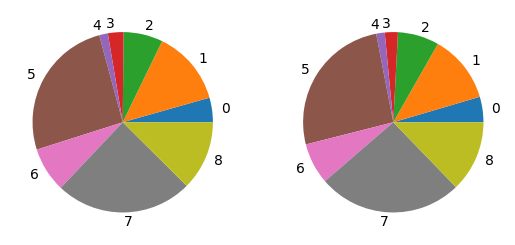

In [43]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.pie(np.unique(y_train, return_counts=True)[1], labels=np.unique(y_train, return_counts=True)[0])
ax2.pie(np.unique(y_test, return_counts=True)[1], labels=np.unique(y_test, return_counts=True)[0])
plt.show()

In [49]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest

# select features 
selector = SelectKBest(mutual_info_classif, k=30)

X_train_new = selector.fit_transform(X_train, y_train)
X_test_new = selector.transform(X_test)

In [50]:
scorings = ['accuracy'
            # ,'precision_macro'
            # ,'recall_macro'
            ,'f1_macro'
            ]

In [52]:
from sklearn.model_selection import ParameterGrid

trials = {label: len(list(ParameterGrid(models[label]["param"]))) for label in model_lbls}
trials

{'dt': 38, 'rf': 56}

In [60]:
clfs = []

results_df = pd.DataFrame(columns=["model", "scoring", "best_params", "accuracy", "precision_macro", "recall_macro", "f1_macro"])

In [61]:
# Grid search
for scoring in scorings:
    for lbl in model_lbls:
        clf = GridSearchCV(models[lbl]["estimator"], param_grid=models[lbl]["param"], scoring=scoring)
        clf.fit(X_train_new, y_train)

        clfs.append(clf)

        y_pred = clf.predict(X_test_new)

        cr = classification_report(y_test, y_pred, output_dict=True)

        results_df.loc[len(results_df)] = [models[lbl]["name"], scoring, clf.best_params_, cr["accuracy"], cr["macro avg"]["precision"], cr["macro avg"]["recall"], cr["macro avg"]["f1-score"]]

In [62]:
for scoring in scorings:
    display(results_df[results_df["scoring"] == scoring].sort_values(by=scoring, ascending=False).drop(["scoring"], axis=1))

,model,best_params,accuracy,precision_macro,recall_macro,f1_macro
1,Random forest,"{'class_weight': None, 'max_depth': 4, 'n_esti...",0.337606,0.126433,0.173605,0.135067
0,Decision Tree,"{'class_weight': None, 'max_depth': 2}",0.311990,0.103134,0.163666,0.124091


,model,best_params,accuracy,precision_macro,recall_macro,f1_macro
3,Random forest,"{'class_weight': 'balanced', 'max_depth': 8, '...",0.280596,0.161545,0.174387,0.161736
2,Decision Tree,"{'class_weight': None, 'max_depth': 18}",0.227051,0.140362,0.143883,0.141485


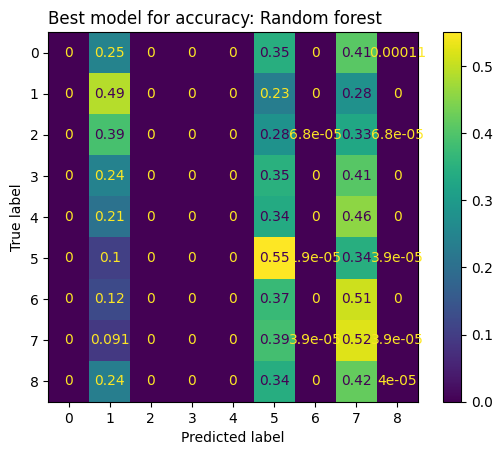

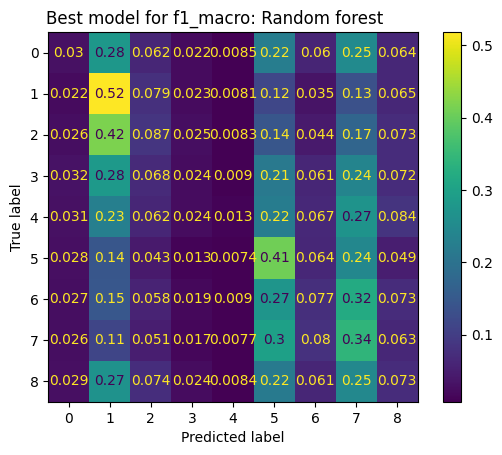

In [66]:
for scoring in scorings:
    best_row = results_df.loc[results_df["scoring"]==scoring, scoring].idxmax()
    disp = ConfusionMatrixDisplay.from_estimator(clfs[best_row], X_test_new, y_test, normalize="true")
    disp.ax_.set_title(f"Best model for {scoring}: {results_df.loc[best_row]['model']}")